# 21 - Decision Trees

In [ ]:
# 
# 
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
# 
# 
# 
# from sklearn.datasets import load_iris, fetch_california_housing
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
# 

## Introduction to Decision Trees
A **decision tree** is a model widely used in Machine Learning to solve both <u>regression</u> and <u>classification</u> problems. It is a graphical model that mimics human decision making, i.e. it is based on a series of questions to reach a conclusion.

The main idea behind decision trees is to divide data into smaller and smaller groups (called nodes) based on different criteria until a final result or decision is reached. These criteria are selected in such a way that the elements of each node are as similar as possible to each other.

### Structure
The structure of a decision tree resembles that of an inverted tree. It starts with a node called **root node** that contains all the data. This node is split into two or more child nodes based on some criterion. These are the **decision nodes**. This process is repeated for each child node, creating what are called **branches**, until a node is reached that is no longer split. These final nodes are called **leaf nodes** and represent the final decision or prediction of the tree.

<p align="center">
  <img src="imgs/decision_trees1.png" alt="Alt text" width="600" height="350">
</p>

An important aspect of decision trees is that they are very interpretable models. You can visualize the entire tree and follow the decisions it makes, which is not possible in many other types of models. However, they can be prone to overfitting, especially if the tree is allowed to grow too large.

<a id="2-a-simple-example-classification"></a>
## A Simple Example (Classification)
Let’s understand decision trees with the help of an example. Say we want to build a decision tree to determine whether we should play soccer or not.

In [1]:
import pandas as pd

data_dict = {
    "Weather": ["Sunny", "Cloudy", "Sunny", "Cloudy", "Rainy", "Rainy", "Rainy", "Sunny", "Cloudy", "Rainy"],
    "Humidity": ["High", "High", "Normal", "High", "High", "Normal", "High", "High", "Normal", "High"],
    "Wind": ["Weak", "Weak", "Strong", "Strong", "Strong", "Strong", "Weak", "Strong", "Weak", "Strong"],
    "Play": ["No", "Yes", "Yes", "Yes", "No", "No", "Yes", "No", "Yes", "No"],
}

df = pd.DataFrame(data=data_dict)
df

Weather Humidity    Wind Play
0   Sunny     High    Weak   No
1  Cloudy     High    Weak  Yes
2   Sunny   Normal  Strong  Yes
3  Cloudy     High  Strong  Yes
4   Rainy     High  Strong   No
5   Rainy   Normal  Strong   No
6   Rainy     High    Weak  Yes
7   Sunny     High  Strong   No
8  Cloudy   Normal    Weak  Yes
9   Rainy     High  Strong   No

Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In the below diagram the tree will first ask what is the weather? Is it sunny, cloudy, or rainy? If yes then it will go to the next feature which is humidity and wind. It will again check if there is a strong wind or weak, if it’s a weak wind and it’s rainy then the person may go and play.

<p align="center">
  <img src="imgs/decision_trees2.png" alt="Alt text" width="650" height="350">
</p>

Did you notice anything in the above flowchart? We see that if the weather is cloudy then we must go to play. Why didn’t it split more? Why did it stop there?

To answer this question, we need to know about few more concepts like entropy, information gain, and Gini index. But in simple terms, I can say here that the output for the training dataset is always yes for instances where the weather is `"Cloudy"`, since there is no need to split the node further.

In [2]:
# The output is always "Yes" for "Cloudy" data points
df[df["Weather"] == "Cloudy"]

Weather Humidity    Wind Play
1  Cloudy     High    Weak  Yes
3  Cloudy     High  Strong  Yes
8  Cloudy   Normal    Weak  Yes

The goal of machine learning is to decrease uncertainty or disorders from the dataset and for this, we use decision trees.

Now you must be thinking how do I know what should be the root node? What should be the decision node? When should I stop splitting? To decide this, there is a metric called “Entropy” which is the amount of uncertainty in the dataset.

### `scikit-learn`'s Implementation
Lets fit a decision tree to our dataset using `scikit-learn`. 

`scikit-learn`'s implementation requires numerical values, so categorical features need to be preprocessed into a numerical format using either factorization, one-hot-encoding, or another encoding method. To meet this requirement, lets set up a pipeline to transform our categorical features to numeric using label encoding. For this, we create a custom transformer class and set up a pipeline.

Note: The target variable `Play` does not need to be encoded.

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# Custom transformer to label encode categorical features
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = {}
        self.mapping = {}
    
    def fit(self, X, y=None):
        for column in X.columns:
            le = LabelEncoder()
            le.fit(X[column])
            self.encoders[column] = le
            self.mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))
        return self
    
    def transform(self, X):
        X_encoded = X.copy()
        for column, encoder in self.encoders.items():
            X_encoded[column] = encoder.transform(X[column])
        return X_encoded

# Define preprocessing steps
categorical_features = ["Weather", "Humidity", "Wind"]
categorical_transformer = CustomLabelEncoder()

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical_preprocessor", categorical_transformer, categorical_features)
    ])

# Define pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

Now split our features and target variable.

In [4]:
# Split features and target variable
X = df.drop(columns=['Play'])
y = df['Play']

In [5]:
X

Weather Humidity    Wind
0   Sunny     High    Weak
1  Cloudy     High    Weak
2   Sunny   Normal  Strong
3  Cloudy     High  Strong
4   Rainy     High  Strong
5   Rainy   Normal  Strong
6   Rainy     High    Weak
7   Sunny     High  Strong
8  Cloudy   Normal    Weak
9   Rainy     High  Strong

In [6]:
y

0     No
1    Yes
2    Yes
3    Yes
4     No
5     No
6    Yes
7     No
8    Yes
9     No
Name: Play, dtype: object

Fit the pipeline.

In [7]:
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_preprocessor',
                                                  CustomLabelEncoder(),
                                                  ['Weather', 'Humidity',
                                                   'Wind'])])),
                ('classifier', DecisionTreeClassifier())])

We can also see how the `CustomLabelEncoder` transformed our categorical features. We can also see the mapping.

In [8]:
# Transform X using the pipeline
X_transformed = pipeline.named_steps['preprocessor'].transform(X)

# Extract mapping from the custom label encoder
label_mapping = pipeline.named_steps['preprocessor'].named_transformers_['categorical_preprocessor'].mapping
print("Label Encoding Mapping:")
print(label_mapping)

# Combine transformed features with the target variable
df_transformed = pd.DataFrame(X_transformed, columns=categorical_features)
df_transformed['Play'] = y

df_transformed

Label Encoding Mapping:
{'Weather': {'Cloudy': 0, 'Rainy': 1, 'Sunny': 2}, 'Humidity': {'High': 0, 'Normal': 1}, 'Wind': {'Strong': 0, 'Weak': 1}}


Weather  Humidity  Wind Play
0        2         0     1   No
1        0         0     1  Yes
2        2         1     0  Yes
3        0         0     0  Yes
4        1         0     0   No
5        1         1     0   No
6        1         0     1  Yes
7        2         0     0   No
8        0         1     1  Yes
9        1         0     0   No

### Decision Tree Visualization
We can also visualize our decision tree.

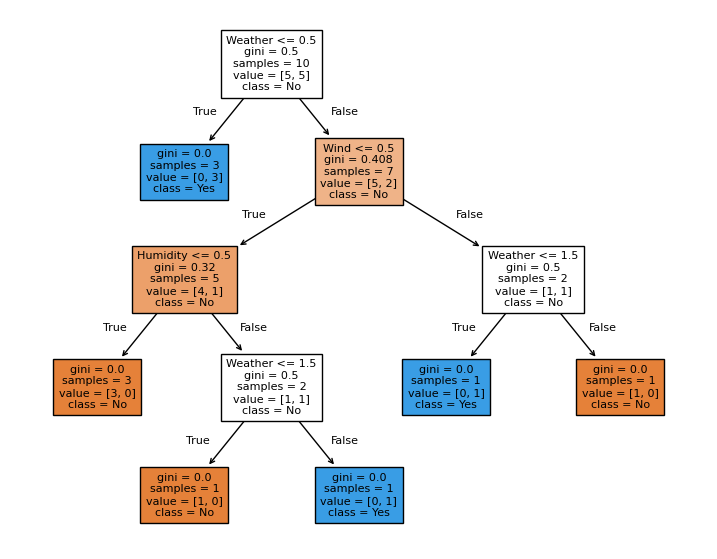

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(9, 7))
plot_tree(pipeline['classifier'], feature_names=X.columns, class_names=pipeline['classifier'].classes_, filled=True, fontsize=8)

# Get the axes of the plot
ax = plt.gca()

# Coordinates for True/False labels
coords = [
    (0.28, 0.81, 0.48, 0.81),
    (0.35, 0.62, 0.66, 0.62),
    (0.15, 0.41, 0.35, 0.41),
    (0.65, 0.41, 0.85, 0.41),
    (0.27, 0.2, 0.48, 0.2),
]

# Add True or False labels
for x1, y1, x2, y2 in coords:
    ax.text(x1, y1, 'True', color='black', fontsize=8, ha='center', va='center')
    ax.text(x2, y2, 'False', color='black', fontsize=8, ha='center', va='center')

plt.show()

Each node contains several pieces of information that provide insights into how the tree makes decisions,

<p align="center">
  <img src="imgs/decision_trees4.png" alt="Alt text" width="400" height="150">
</p>

1. **Decision Criteria**: This indicates the feature and threshold used to make the split at the current node. For example, "Humidity <= 0.5" means that the decision tree splits the data based on whether the humidity feature is less than or equal to 0.5.

2. **Gini Impurity or Entropy**: Gini impurity or entropy measures how well a split separates classes. Lower values indicate higher purity, meaning the node predominantly contains instances of a single class.

3. **Samples**: This shows the number of samples that reach the node during the training process. It represents the total number of instances from the dataset that satisfy the conditions to reach this node.

4. **Value**: Value represents the distribution of classes in the node. It indicates the count of instances from each class present in the node. For example, if the value is [5, 10], it means there are 5 instances of one class and 10 instances of another class.

5. **Class**: This indicates the predicted class for the majority of instances in the node. It represents the class label that the decision tree assigns to new instances that reach this node during prediction.

### Making Predictions
Lets define a new data point to make a prediction.

In [10]:
# Define the new data point
new_data_dict = {
    "Weather": ["Sunny"],
    "Humidity": ["High"],
    "Wind": ["Weak"],
}

# Create a DataFrame for the new data point
new_df = pd.DataFrame(data=new_data_dict)
new_df

Weather Humidity  Wind
0   Sunny     High  Weak

The pipeline we created will label encode the categorical features, lets see what that looks like.

In [11]:
# Transform the new data point using the preprocessor
new_data_transformed = pipeline.named_steps['preprocessor'].transform(new_df)

# Combine transformed features into a DataFrame
new_data_transformed_df = pd.DataFrame(new_data_transformed, columns=categorical_features)

print("Label Encoding Mapping:")
print(label_mapping)

print("\nTransformed new data point:")
new_data_transformed_df

Label Encoding Mapping:
{'Weather': {'Cloudy': 0, 'Rainy': 1, 'Sunny': 2}, 'Humidity': {'High': 0, 'Normal': 1}, 'Wind': {'Strong': 0, 'Weak': 1}}

Transformed new data point:


Weather  Humidity  Wind
0        2         0     1

Now lets use the pipeline to make a prediction. The raw data is passed through.

In [12]:
# Use the pipeline to make predictions
prediction = pipeline.predict(new_df)
print("Prediction:", prediction[0])

Prediction: No


Our model's prediction was **No**. We can actually visualize this decision path,

<p align="center">
  <img src="imgs/decision_trees3.png" alt="Alt text" width="650" height="550">
</p>

## A More Complex Example (Classification)
Now we'll explore another example using a dataset that has already been previously treated with a full EDA.

### Step 1. Read and perform EDA on the dataset

In [13]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable as species names
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].apply(lambda x: iris.target_names[x])

# Display the DataFrame
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

Understanding the distribution of labels (or categories) in your dataset is a crucial step in data analysis and model building. This step helps you to:
- **Detect Imbalance**: Identify any imbalances in the dataset, where certain classes might be underrepresented. This can affect the performance of your model, especially in classification tasks.

- **Inform Sampling Strategies**: Decide on appropriate sampling strategies, such as oversampling minority classes or undersampling majority classes, to address class imbalance.

- **Evaluate Model Performance**: Ensure that your evaluation metrics take into account the distribution of the classes, particularly if there is a significant class imbalance.

Here is how you can explore the distribution of species in the Iris dataset:

In [14]:
# Get the value counts of each species
iris_df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

One way to visualize the relationship of variables to the target is by using a new type of graph, `parallel_coordinates`. It's a data visualization technique used to plot multivariate numerical variables:

<Axes: >

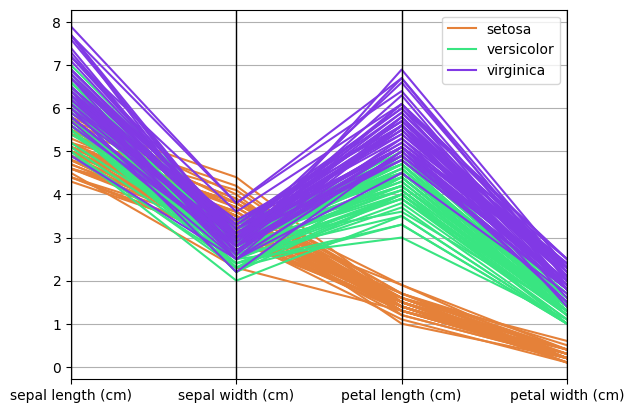

In [15]:
pd.plotting.parallel_coordinates(iris_df, "species", color = ("#E58139", "#39E581", "#8139E5"))

We can appreciate how the values of the predictors are distributed in the different flower classes. This can be a good graph to include in our EDA analysis from now on, as it helps us to identify patterns and correlations between variables.

Before we can do a train/test split we must first separate the features and target.

In [16]:
# Separate the features and target
X = iris_df.drop('species', axis=1)
X

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [17]:
# Separate the features and target
y = iris_df['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

### Step 2. train/test Split
The *train* set will be used to train the model, while the *test* set will be used to evaluate the effectiveness of the model.

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


In [19]:
# Inspect X_train
X_train.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
8                  4.4               2.9                1.4               0.2
106                4.9               2.5                4.5               1.7
76                 6.8               2.8                4.8               1.4
9                  4.9               3.1                1.5               0.1
89                 5.5               2.5                4.0               1.3

**Note:** Scaling is not necessary for decision trees. Decision trees are insensitive to the scale of the features because they make decisions based on the feature values' order and thresholds rather than their magnitude. This is one of the advantages of decision trees over other algorithms like logistic regression, support vector machines, or k-nearest neighbors, which can be sensitive to feature scaling.

### Step 3: Model initialization and training

In [20]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Once the model has been trained correctly, we can visualize the tree with the same library. This visualization represents all the steps that the model has followed until the construction of the tree.

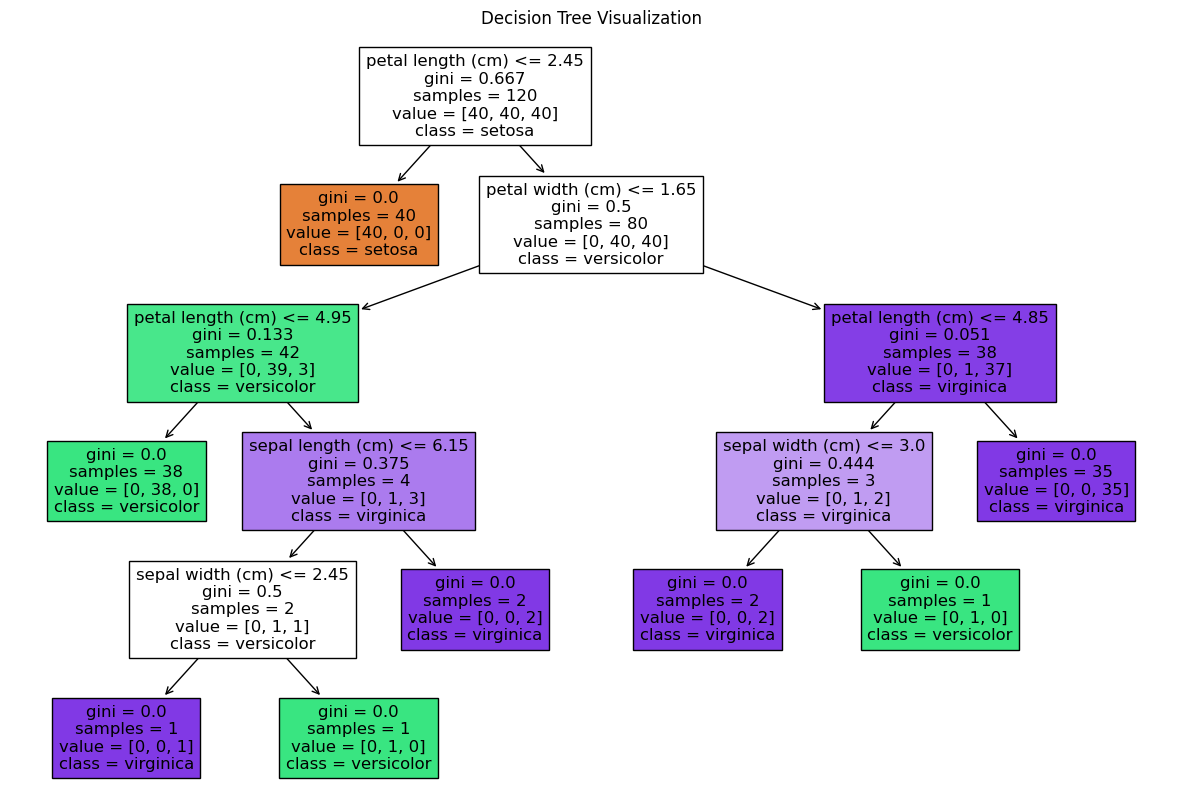

In [21]:
# Visualize the trained decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

### Step 4: Model Evaluation

Once the model has been trained, it can be used to predict with the test data set.

In [23]:
# Predict the labels for the test set
y_pred = model.predict(X_test)

test_df = X_test.copy()
test_df["species"] = y_test
test_df["Predictions"] = y_pred
test_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
38                 4.4               3.0                1.3               0.2   
127                6.1               3.0                4.9               1.8   
57                 4.9               2.4                3.3               1.0   
93                 5.0               2.3                3.3               1.0   
42                 4.4               3.2                1.3               0.2   

        species Predictions  
38       setosa      setosa  
127   virginica   virginica  
57   versicolor  versicolor  
93   versicolor  versicolor  
42       setosa      setosa

With raw data, it is very difficult to know whether the model is getting it right or not. To do this, we must compare it with reality. There are many metrics to measure the effectiveness of a model in predicting, including accuracy, which is the fraction of predictions that the model makes correctly.

In [24]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Getting an accuracy of 1.0 on both the training and test sets is unusual and can indicate a few different scenarios:

1. **Perfect Model**: The model might be perfectly suited to the data, capturing all patterns without overfitting or underfitting. This is rare, especially with real-world data.

2. **Overfitting**: More commonly, a perfect accuracy score indicates overfitting, where the model has memorized the training data and fails to generalize well to new, unseen data. Overfitting is particularly likely if the model is too complex (e.g., a decision tree with very deep splits).

3. **Simple Dataset**: The dataset might be very simple, with clear, easily separable classes. The Iris dataset is relatively simple, and some models can achieve very high accuracy on it, but achieving a perfect score is still uncommon without overfitting.

To better understand the performance of your model, you can use additional evaluation techniques:

1. **Cross-Validation**: Perform k-fold cross-validation to ensure the model generalizes well across different subsets of the data.

2. **Learning Curves**: Plot learning curves to visualize how training and validation accuracy evolve with different training set sizes.

3. **Regularization**: Apply regularization techniques to prevent overfitting. For decision trees, this can include setting a maximum depth, minimum samples per leaf, or pruning the tree.

Here’s how you can perform cross-validation:

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.91666667 0.95833333 0.95833333 0.95833333 0.91666667]
Mean cross-validation score: 0.9416666666666668


### Step 5: Model Optimization
Hyperparameter optimization in decision trees involves systematically searching for the best combination of hyperparameters to improve model performance. This process typically uses techniques like grid search or randomized search combined with cross-validation to evaluate different hyperparameter combinations.

Some of a decision tree's hyperparameters include:

- `criterion`: The function to measure the quality of a split.

- `max_depth`: The maximum depth of the tree. This limits how many splits it can have, which is useful to prevent overfitting. If this value is `None`, then nodes are expanded until leaves are pure or until all leaves contain fewer samples than `min_samples_split`

- `min_samples_split`: The minimum number of samples needed to split a node. If a node has less samples than `min_samples_split`, then it will not be split, even if it is not pure. Helps prevent overfitting.

- `min_samples_leaf`: The minimum number of samples that must be in a leaf node. A node will split if doing so creates at least `min_samples_leaf` samples in each of the children. This also helps to prevent overfitting.

- `max_features`: The maximum number of features to consider when looking for the best split. If `max_features` is `None`, then all features will be considered. Reducing this number may make the model simpler and faster to train, but may also cause it to miss some important relationships.

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [27]:
# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [28]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.91666667 0.95833333 0.95833333 0.95833333 0.91666667]
Mean cross-validation score: 0.9416666666666668


### Step 6: Making Predictions

In [29]:
# Generate a new random data point (for demonstration)
new_data_df = pd.DataFrame([[6.0, 3.0, 5.0, 2.0]], columns=iris.feature_names)

# Predict the species of the new data point
predicted_species = best_model.predict(new_data_df)
new_data_df["Prediction"] = predicted_species

new_data_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.0               3.0                5.0               2.0   

  Prediction  
0  virginica

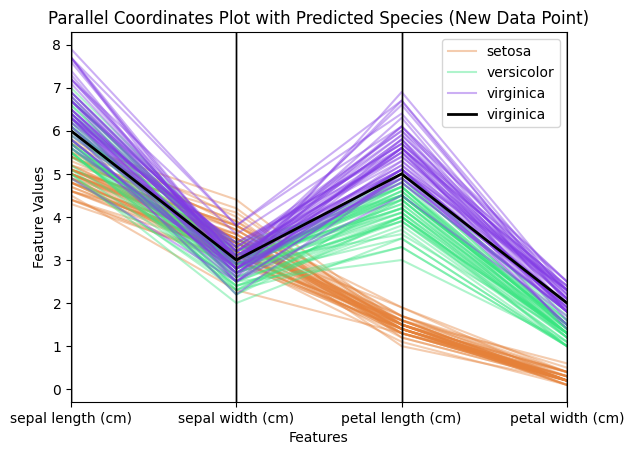

In [30]:
# Plotting using parallel coordinates
pd.plotting.parallel_coordinates(iris_df, "species", color=("#E58139", "#39E581", "#8139E5"), alpha=0.4)
pd.plotting.parallel_coordinates(new_data_df, "Prediction", color="black", linewidth=2)
plt.title('Parallel Coordinates Plot with Predicted Species (New Data Point)')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.legend(loc='upper right')
plt.show()

## A Simple Example (Regression)
Decision trees are not limited to just classification problems; they can also be used for <u>regression</u> tasks. Let's explore this through a simple example.

The objective is to train a decision tree to predict the target variable, `MedianHouseValue`.

### Step 1. Read and perform EDA on the dataset

In [31]:
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()

# Create a DataFrame from the data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Subset some of the features to simplify this example
df = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']]

# Add the target variable to the DataFrame
df['MedianHouseValue'] = data.target

# Sample 10 rows to simplify this example
df = df.sample(n=10, random_state=42)

# Display the first few rows of the DataFrame
df.head()


MedInc  HouseAge  AveRooms  AveBedrms  MedianHouseValue
20046  1.6812      25.0  4.192201   1.022284           0.47700
3024   2.5313      30.0  5.039384   1.193493           0.45800
15663  3.4801      52.0  3.977155   1.185877           5.00001
20484  5.7376      17.0  6.163636   1.020202           2.18600
9814   3.7250      34.0  5.492991   1.028037           2.78000

Here’s a brief overview of what each feature represents:

- `MedInc`: Median income in the block group

- `HouseAge`: Median age of the houses in the block group

- `AveRooms`: Average number of rooms per household

- `AveBedrms`: Average number of bedrooms per household

- `MedianHouseValue` (Target): Median house value for households within a block group, expressed in hundreds of thousands of dollars (i.e., $100,000s)

In [32]:
# Separate the features and target
X = df.drop('MedianHouseValue', axis=1)
X

MedInc  HouseAge  AveRooms  AveBedrms
20046  1.6812      25.0  4.192201   1.022284
3024   2.5313      30.0  5.039384   1.193493
15663  3.4801      52.0  3.977155   1.185877
20484  5.7376      17.0  6.163636   1.020202
9814   3.7250      34.0  5.492991   1.028037
13311  4.7147      12.0  5.251483   0.975089
7113   5.0839      36.0  6.221719   1.095023
7668   3.6908      38.0  4.962825   1.048327
18246  4.8036       4.0  3.924658   1.035959
5723   8.1132      45.0  6.879056   1.011799

In [33]:
# Separate the features and target
y = df['MedianHouseValue']
y

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
13311    1.58700
7113     1.98200
7668     1.57500
18246    3.40000
5723     4.46600
Name: MedianHouseValue, dtype: float64

### Step 2. train/test Split

In [34]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8, 4)
y_train shape: (8,)
X_test shape: (2, 4)
y_test shape: (2,)


In [35]:
# Inspect X_train
X_train.head()

MedInc  HouseAge  AveRooms  AveBedrms
13311  4.7147      12.0  5.251483   0.975089
20046  1.6812      25.0  4.192201   1.022284
7668   3.6908      38.0  4.962825   1.048327
15663  3.4801      52.0  3.977155   1.185877
5723   8.1132      45.0  6.879056   1.011799

### Step 3: Model initialization and training
Since this is a regression task, note the use of `scikit-learn`'s `DecisionTreeRegressor` instead of `DecisionTreeClassifier`.

In [36]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

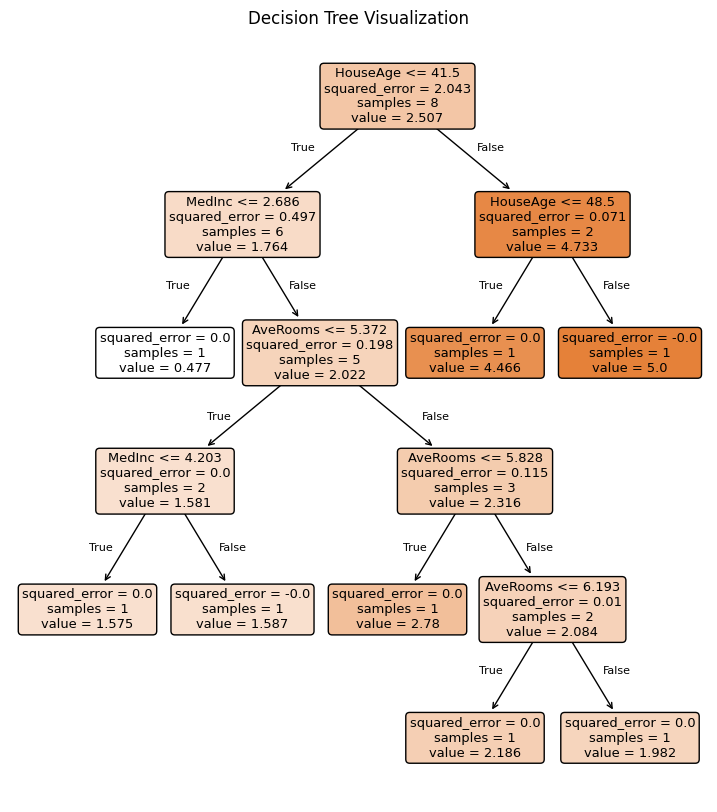

In [37]:
# Visualize the trained decision tree
plt.figure(figsize=(9, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Visualization")

# Get the axes of the plot
ax = plt.gca()

# Coordinates for True/False labels
coords = [
    (0.42, 0.85, 0.69, 0.85),
    (0.24, 0.67, 0.42, 0.67),
    (0.69, 0.67, 0.87, 0.67),
    (0.30, 0.50, 0.61, 0.50),
    (0.13, 0.33, 0.32, 0.33),
    (0.58, 0.33, 0.76, 0.33),
    (0.69, 0.17, 0.87, 0.17),
]

# Add True or False labels
for x1, y1, x2, y2 in coords:
    ax.text(x1, y1, 'True', color='black', fontsize=8, ha='center', va='center')
    ax.text(x2, y2, 'False', color='black', fontsize=8, ha='center', va='center')

plt.show()

The components we see in the nodes of this decision tree regressor differ slightly than the components we saw in the nodes of the decision tree classifiers. The pieces of information we see in these nodes include:

<p align="center">
  <img src="imgs/decision_trees5.png" alt="Alt text" width="400" height="150">
</p>

1. **Decision Criteria**: The condition or rule based on which the data is split at each node. For example, "*Is feature X greater than 5?*"

2. **Squared Error (MSE)**: A measure of the average squared difference between the actual and predicted values in the dataset subset at that node.

3. **Samples**: Indicates the number of data points or samples that satisfy the decision criteria at that particular node.

4. **Value**: Represents the predicted output or target variable at this node. For regression trees, this typically corresponds to the *mean* (or another suitable summary statistic) of the target variable values of the samples in that node.

In [38]:
# Value of the root node = the mean of the 8 original training samples
round(y_train.mean(), 3)

2.507

### Step 4: Model Evaluation
Once the model has been trained, it can be used to predict with the test data set.

In [39]:
# Predict the labels for the test set
y_pred = model.predict(X_test)

test_df = X_test.copy()
test_df["MedianHouseValue"] = y_test
test_df["Predictions"] = y_pred
test_df

MedInc  HouseAge  AveRooms  AveBedrms  MedianHouseValue  Predictions
18246  4.8036       4.0  3.924658   1.035959             3.400        1.587
3024   2.5313      30.0  5.039384   1.193493             0.458        0.477

We can visualize the decision path for the first test data point:

In [40]:
test_df.head(1)

MedInc  HouseAge  AveRooms  AveBedrms  MedianHouseValue  Predictions
18246  4.8036       4.0  3.924658   1.035959               3.4        1.587

<p align="center">
  <img src="imgs/decision_trees6.png" alt="Alt text" width="650" height="600">
</p>

**MSE (Mean Squared Error)** is used as a metric for evaluating decision tree regressors, whereas accuracy is typically used for classification tasks (like those handled by decision tree classifiers). This is better explained due to the nature of predictions:

- **Regression**: In regression tasks, the model predicts continuous values (e.g., house prices, temperature), and MSE measures how close these predictions are to the actual values. It quantifies the average squared difference between predicted and actual values.

- **Classification**: In classification tasks, the model predicts categorical labels or classes (e.g., spam/not spam, classes of animals), and accuracy measures the proportion of correctly predicted labels out of all predictions.

Given the small test set, we can calculate the MSE by hand,

In [41]:
# Reprinting test predictions
test_df

MedInc  HouseAge  AveRooms  AveBedrms  MedianHouseValue  Predictions
18246  4.8036       4.0  3.924658   1.035959             3.400        1.587
3024   2.5313      30.0  5.039384   1.193493             0.458        0.477

Recall that MSE measures the average squared difference between the predicted values and the actual values.

Mathematically, MSE is calculated as:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

We can evaluate the MSE from our 2 test data points,

$$ MSE = \frac{1}{2} \sum_{i=1}^{2} (y_i - \hat{y}_i)^2 $$

$$ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ = \frac{1}{2} ((y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2) $$

$$ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ = \frac{1}{2} ((3.400 - 1.587)^2 + (0.458	 - 0.477)^2) $$

$$ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ = \frac{1}{2} (3.286969 + 0.000361) $$

$$ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ \approx 1.643665 $$

In [42]:
from sklearn.metrics import mean_squared_error

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Mean squared error: 1.6436649999999997


## In summary, how decision tree algorithms work?
Decision Tree algorithm works in a series of steps:

1. **Starting at the Root**: The algorithm begins at the top, called the “root node,” representing the entire dataset.

2. **Asking the Best Questions**: It looks for the most important feature or question that splits the data into the most distinct groups. This is like asking a question at a fork in the tree.

3. **Branching Out**: Based on the answer to that question, it divides the data into smaller subsets, creating new branches. Each branch represents a possible route through the tree.

4. **Repeating the Process**: The algorithm continues asking questions and splitting the data at each branch until it reaches the final “leaf nodes,” representing the predicted outcomes or classifications.
